In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv('CAR DETAILS.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [54]:
data.shape

(4340, 8)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [56]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [57]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [58]:
data.duplicated().sum()

763

In [59]:
data.drop_duplicates(inplace=True)

In [60]:
data[data.duplicated()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [61]:
data.shape

(3577, 8)

In [62]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [63]:
data['brand'] = data['name'].apply(lambda x: x.split(' ')[0])
data['model'] = data['name'].apply(lambda x: ' '.join(x.split(' ')[1:]))
data.drop('name', axis=1, inplace=True)

In [64]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [65]:
data['brand'].value_counts()

brand
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [66]:
data['model'].value_counts()

model
Swift Dzire VDI             54
Alto 800 LXI                48
Alto LXi                    42
Alto LX                     30
Swift VDI BSIV              28
                            ..
Innova 2.5 E 8 STR           1
Micra XL CVT                 1
Scorpio VLX AT 2WD BSIII     1
Corolla AE                   1
i20 Magna 1.4 CRDi           1
Name: count, Length: 1491, dtype: int64

## Data visualization

the most comman car model are used by people


Above the chart is showing that the most comman model is maruti.

In [67]:
def visualize(data,column):

  print('countplot visualization')
 
  plt.figure(figsize = (10,7))
  sns.countplot(data = data,  x = column, palette= 'CMRmap' )
  plt.xticks(rotation = 45)
  plt.xlabel(column, fontsize = 12, color = 'b')
  plt.ylabel('count',fontsize = 12, color = 'b')
  plt.title(f'distrubution {column} is Year by', color = 'blue', fontsize = 12)
  plt.legend()
  plt.show()
  print('\n')

  print('pie chart visualization')
  print('\n')
  labels = data[column].value_counts().index
  size = data[column].value_counts()
  
  plt.figure(figsize = (8,8))
  plt.pie(size, labels = labels , autopct = '%1.1f%%',shadow = True, startangle = 45, rotatelabels=False)
  plt.title(f'distrubution {column} is year by', fontsize = 10, color = 'g')
  plt.show()


  print('\n')
  print('histplot visualization')
  plt.figure(figsize = (8,4))
  sns.histplot(data = data[column], bins = 20, kde = True)
  plt.title(f'distrubution of {column}')
  plt.show()

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


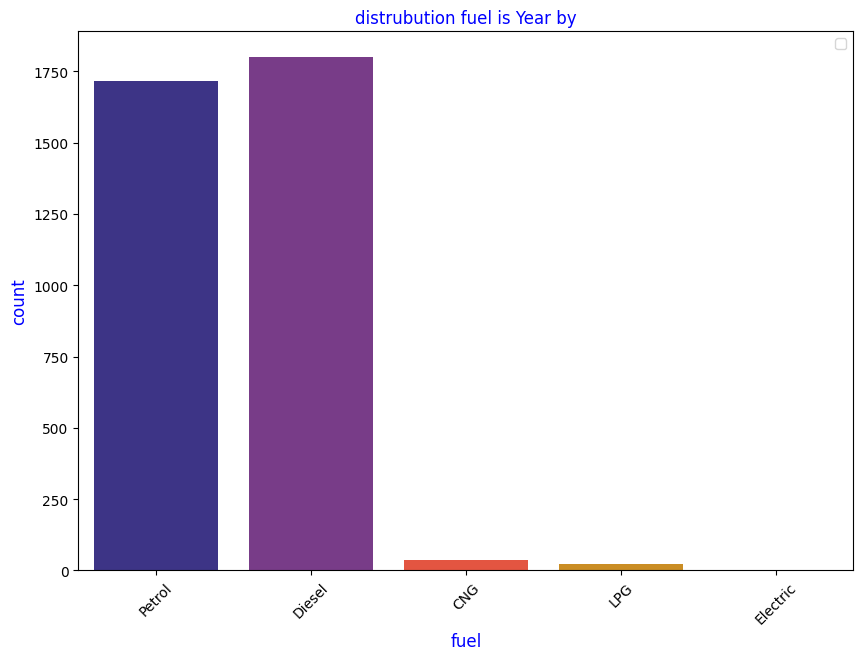



pie chart visualization




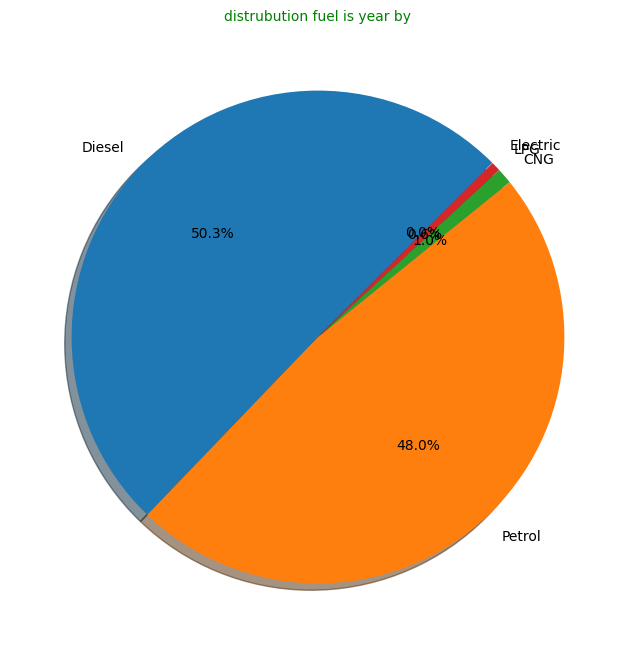



histplot visualization


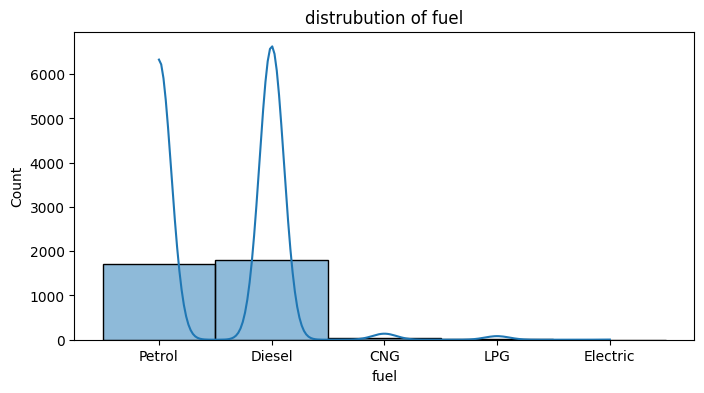

In [68]:

visualize(data,'fuel')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


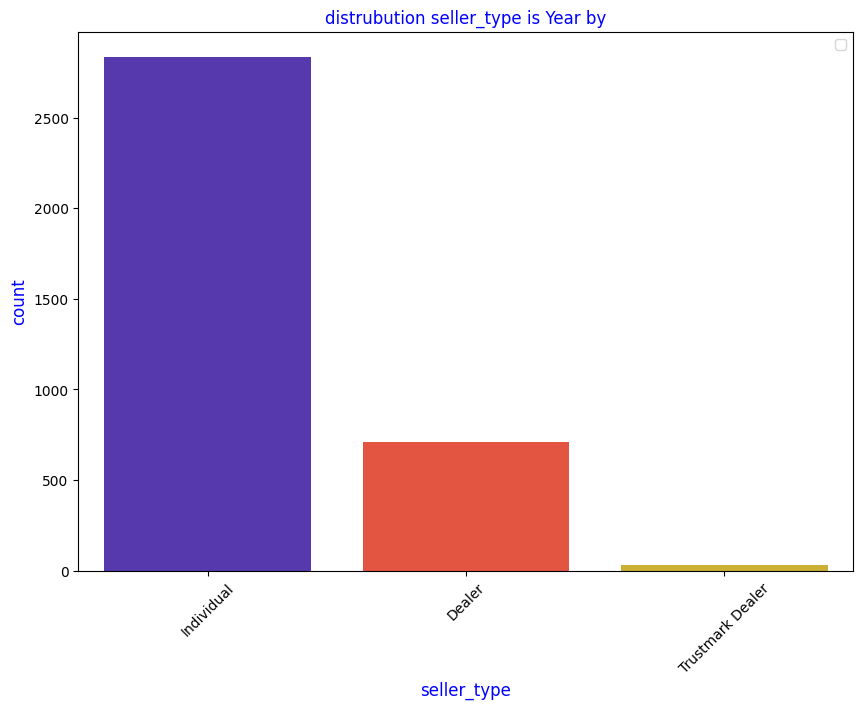



pie chart visualization




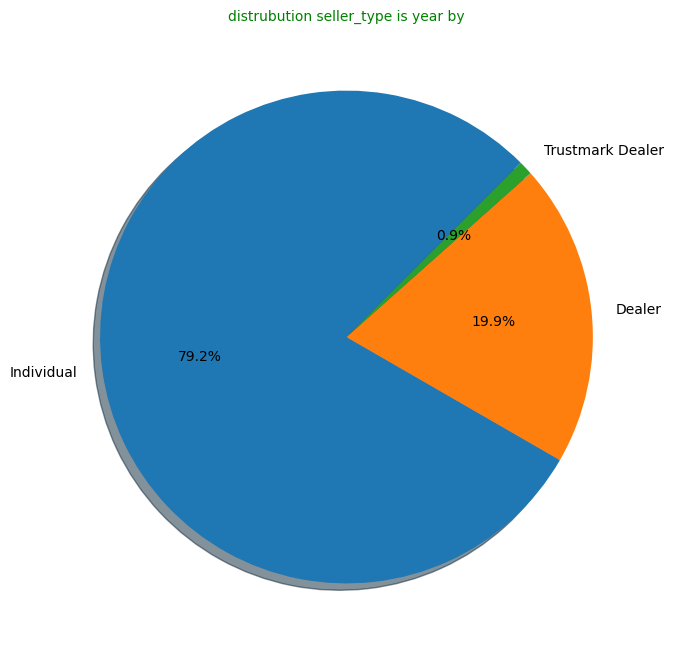



histplot visualization


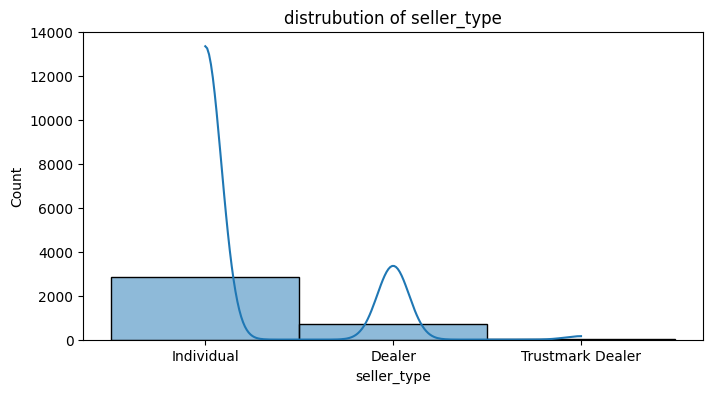

In [69]:
visualize(data,'seller_type')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


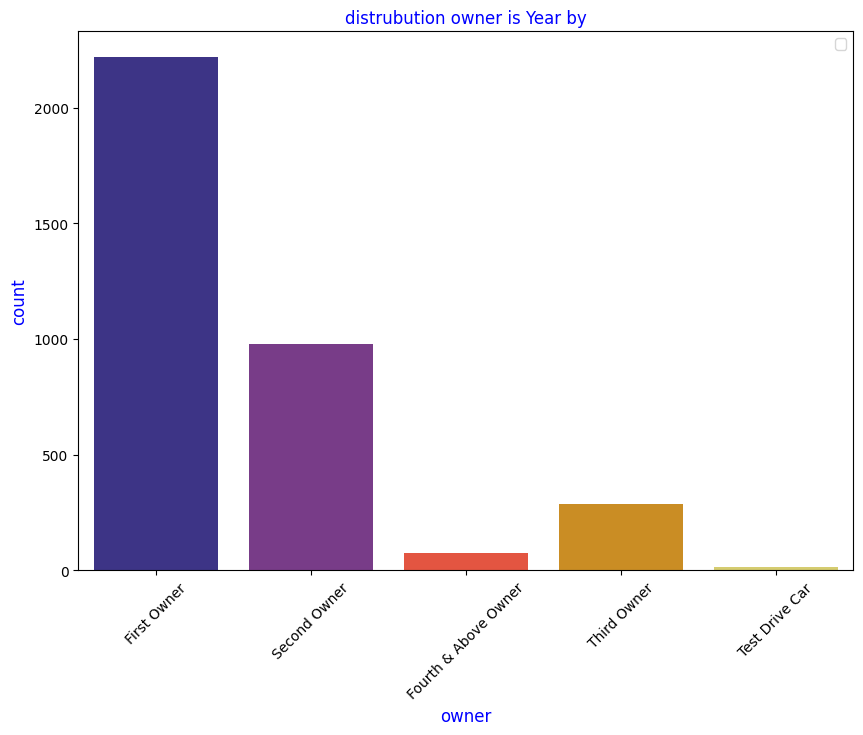



pie chart visualization




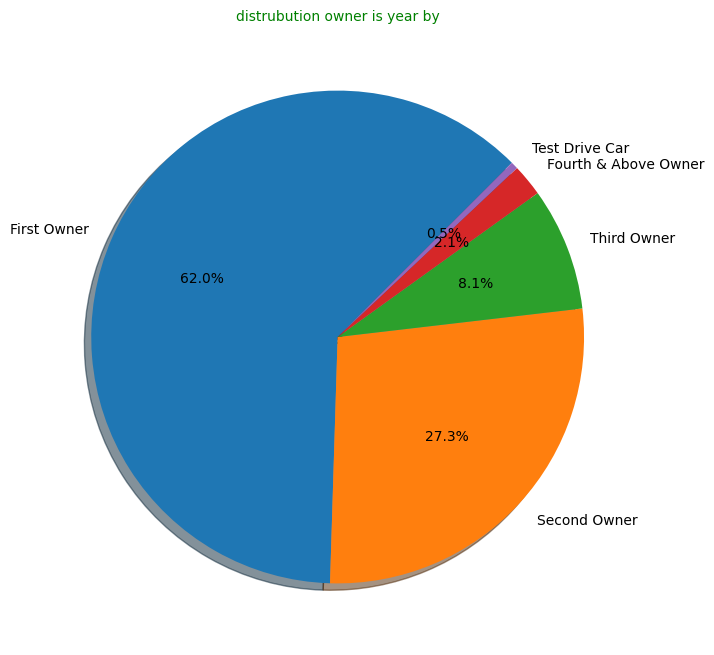



histplot visualization


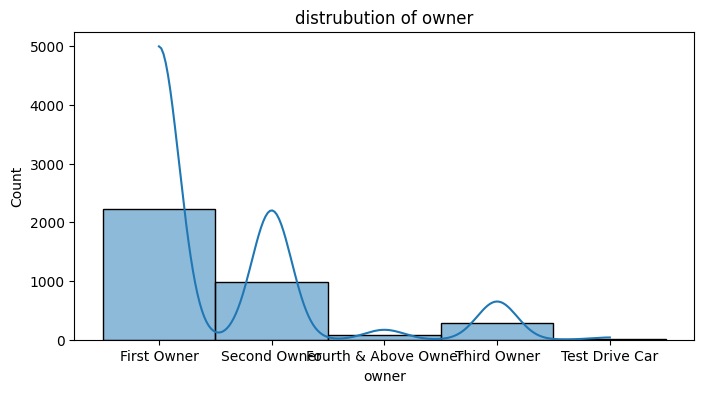

In [70]:
visualize(data,'owner')

countplot visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


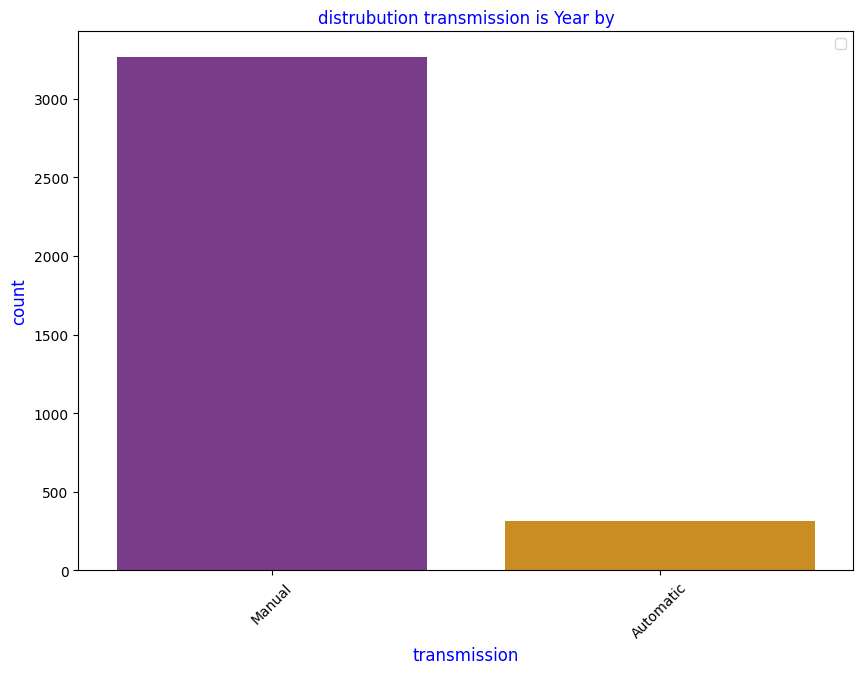



pie chart visualization




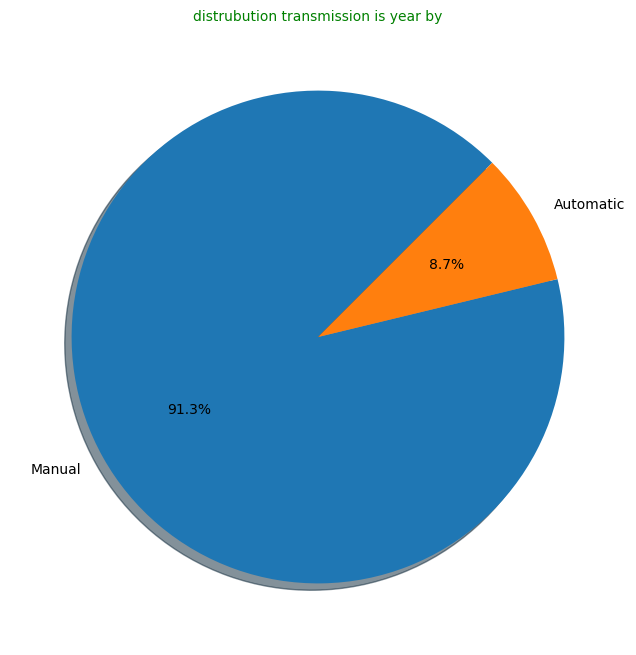



histplot visualization


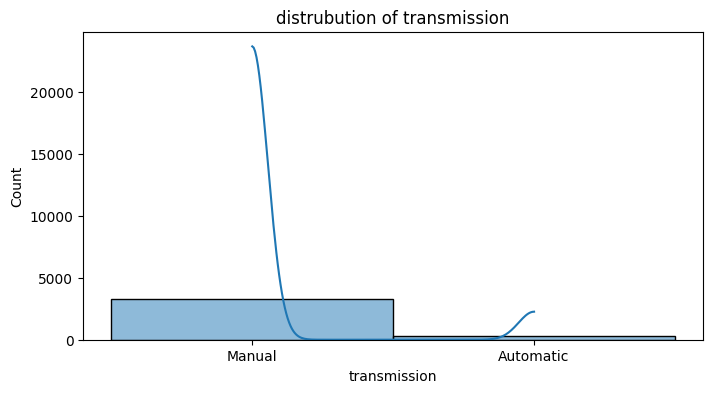

In [71]:
visualize(data,'transmission')

In [72]:
# making copy of orignal dataset

new_df = data.copy()

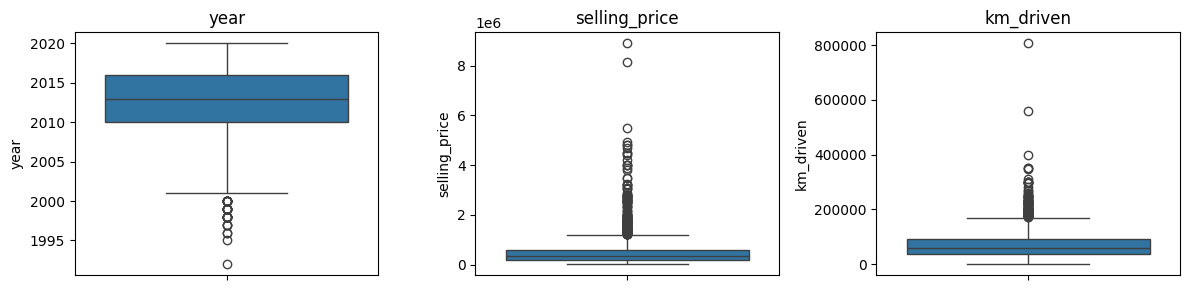

In [73]:
# outlier
columns = ['year','selling_price','km_driven']

fig, axes = plt.subplots(nrows=1, ncols=len(columns),figsize = (12,3) )

for i, column in enumerate(columns):
  sns.boxplot(data = new_df[column], ax = axes[i])
  axes[i].set_title(columns[i])

plt.tight_layout()
plt.show()

In [89]:
# remove outliers
def remove_outliers(data,columns):

  q1,q3 = data[columns].quantile([.25,.75])

  # find iqr
  iqr = q3 - q1

  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  # capping outliers
  outliers = data[(data[columns]>= lower_bound) & (data[columns]<=upper_bound)]

  return outliers

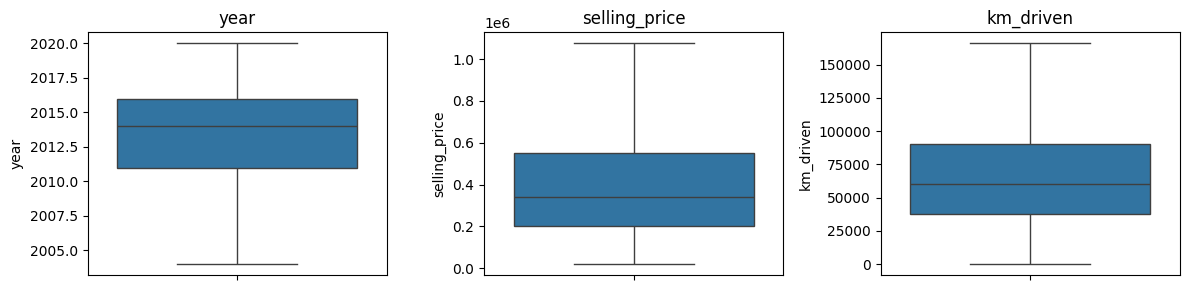

In [90]:
# remove outliers
for column in columns:
  new_df = remove_outliers(new_df, column)

# checking outliers after remove outliers
fig, axes = plt.subplots(nrows=1, ncols=len(columns),figsize = (12,3) )
for i, column in enumerate(columns):
  sns.boxplot(data = new_df[column], ax = axes[i])
  axes[i].set_title(columns[i])

plt.tight_layout()
plt.show()

### now the dataset is free from outliers now i can do next step
## Data Preprocessing
##### Handling categorical columns

In [76]:
new_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [77]:
new_df.to_csv('cleaned_car_data',  index = False)

In [78]:
# first  make a copy of the dataset
df = new_df.copy()

categorical_column = ['fuel','seller_type','transmission','owner','brand','model']

In [79]:
import pickle


brand_names = data['brand'].unique()
model_names = data['model'].unique()

pickle.dump(brand_names,open('brand_name.pkl','wb'))
pickle.dump(model_names,open('model_name.pkl','wb'))


In [80]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
lb = LabelEncoder()

for column in categorical_column:
  df[column] =  lb.fit_transform(df[column])



In [81]:
df.dtypes

year             int64
selling_price    int64
km_driven        int64
fuel             int32
seller_type      int32
transmission     int32
owner            int32
brand            int32
model            int32
dtype: object

In [82]:
df.to_csv('cars_modify.csv', index = False)

In [83]:
df1 = pd.read_csv('cars_modify.csv')
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,4,1,1,0,12,5
1,2007,135000,50000,4,1,1,0,12,1185
2,2012,600000,100000,1,1,1,0,10,1124
3,2017,250000,46000,4,1,1,0,5,833
4,2014,450000,141000,1,1,1,2,9,85


Train the model


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

def compare_models(x_train, y_train, x_test, y_test, models):
    results = []

    for model_name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        results.append((model_name, mae, mse, rmse, r2))

    result_df = pd.DataFrame(
            results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R-squared']
    )
    result_df = result_df.sort_values(by="R-squared", ascending=False)
    return result_df

def evaluate_model(df):
    x = df.drop("selling_price", axis=1)
    y = df["selling_price"]

    x_test, x_train, y_test, y_train = train_test_split(
        x, y, test_size=0.3, random_state=42
    )

    sc = StandardScaler()
    sc.fit_transform(x_train)
    sc.transform(x_test)

    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regressor", RandomForestRegressor()),
        ("Support Vector Regressor", SVR()),
        ("Bagging Regressor", BaggingRegressor())
        ]
        
    results_df = compare_models(x_train, y_train, x_test, y_test, models)

    print("Comparison of Regression Models:")
    print(results_df)

    best_model = models[0][1]  # Best model is the first model in the sorted list

    return best_model


In [85]:
df = pd.read_csv('cars_modify.csv')

In [86]:

best_model = evaluate_model(df)
best_model

Comparison of Regression Models:
                      Model            MAE           MSE           RMSE  \
1   Random Forest Regressor   93039.717396  1.898689e+10  137792.916241   
3         Bagging Regressor   97966.283555  2.103348e+10  145029.246284   
0         Linear Regression  131521.102046  3.044458e+10  174483.740564   
2  Support Vector Regressor  199060.880783  6.480648e+10  254571.177451   

   R-squared  
1   0.698128  
3   0.665589  
0   0.515962  
2  -0.030358  


LinearRegression()

In [87]:
import pickle
# Save the model
# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [88]:
# Load necessary libraries
import pandas as pd
import pickle
import random

# Load the car details dataset
cars_modify = pd.read_csv('cars_modify.csv')

# Pick 20 random data points
random_data = random.sample(list(cars_modify.index), 20)

# Load the saved model
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# Remove the target variable 'selling_price' if present
new_data = cars_modify.drop('selling_price', axis=1, errors='ignore')

# Extract actual selling prices
actual_selling_prices = cars_modify.loc[random_data, 'selling_price']

# Apply the model to the random data
predictions = loaded_model.predict(new_data.loc[random_data])

# Calculate the percentage difference
percentage_difference = ((predictions - actual_selling_prices) / actual_selling_prices) * 100

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Actual Selling Price': actual_selling_prices,
    'Predicted Selling Price': predictions,
    'Percentage Difference': percentage_difference
})

# Print the results
print(results_df)


      Actual Selling Price  Predicted Selling Price  Percentage Difference
1061                120000             77815.441805             -35.153798
290                 755000            685240.201827              -9.239708
554                 600000            598486.574208              -0.252238
212                 290000            329324.061820              13.560021
3156               1000000            596875.818127             -40.312418
2239                300000            404245.265388              34.748422
2777                200000            283601.325640              41.800663
385                 240000            479488.019592              99.786675
1363                300000            391361.077615              30.453693
2884                200000            361092.936385              80.546468
2094                170000            367339.577398             116.082104
914                  80000             70580.145737             -11.774818
3197                50000